# Employee Retention Prediction

> Managers tend to blame their turnover problems on everything under the sun, while ignoring the crux of the matter: people don't leave jobs; they leave managers. -- by Travis BradBerry


## Understand the problem statement and  business case

Recruiting and retaining the right employees is a challenging task that requires capital, time and expertise[1](https://toggl.com/blog/cost-of-hiring-an-employee):

* An average company loses anywhere between 1% and 2.5% of their total revenue on the time it takes to bring a new hire up to speed. 
* Hiring a new employee in SME costs an average of \\$4100 with around 52 days to fill  a position.
* It costs around \\$300 per month to advertise a single job position on one of the major job boards out there.

You work as a data scientist at a multinational corporation. The HR team collected extensive data on their employees and approached you to develop a model that could predict which employees are most likely to leave the company.  

The goal of this notebook is to develop a model that could forecast which employees are most likely to leave the company, so that HR's and/or managers can take meaningful actions to avoid such an outcome. 

## Get to know your data

Before we get into deep visualizations, we want to understand our data and get a general overview of it.  
Questions we would to answer at this stage:

1. How many features and observations are there?
2. The structure of the data
3. The different datatypes we are going to deal with.
4. Distribution and Five number summary
5. ...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/HR-Employee-Attrition.csv')
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
931,30,No,Non-Travel,879,Research & Development,9,2,Medical,1,1298,...,3,80,0,10,3,3,8,4,1,7
1419,42,No,Travel_Rarely,557,Research & Development,18,4,Life Sciences,1,1998,...,3,80,1,9,3,2,4,3,1,2
696,45,No,Non-Travel,805,Research & Development,4,2,Life Sciences,1,972,...,2,80,0,9,5,2,9,7,0,8
1300,34,No,Travel_Rarely,810,Sales,8,2,Technical Degree,1,1823,...,3,80,2,10,5,3,10,8,4,8
219,54,No,Travel_Rarely,1147,Sales,3,3,Marketing,1,303,...,4,80,1,16,4,3,6,2,0,5


In [3]:
# data structure
print(f'Number of features : {df.shape[1]} (target included)')
print(f'Number of observations: {df.shape[0]}')

Number of features : 35 (target included)
Number of observations: 1470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
# Null values
np.sum(df.isnull())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [8]:
cat = df.select_dtypes(include='object').columns
for col in cat:
    print(f'* Unique values in column "{col}":')
    print(df[col].value_counts())
    print('================================================')

* Unique values in column "Attrition":
No     1233
Yes     237
Name: Attrition, dtype: int64
* Unique values in column "BusinessTravel":
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
* Unique values in column "Department":
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
* Unique values in column "EducationField":
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
* Unique values in column "Gender":
Male      882
Female    588
Name: Gender, dtype: int64
* Unique values in column "JobRole":
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Researc

Let's convert variables with type objects to categories. In doing so, we reduce the memory usage of the dataset and simplifies further processing.

In [9]:
df[cat] = df[cat].astype('category')

In [10]:
df.describe(include='category').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


Now we separate the target from the data. We drop the useless features and reassign the target.

In [11]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [12]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [13]:
df = df.drop(columns=[ 'StandardHours', 'Over18', 'EmployeeNumber', 'EmployeeCount'])
df['Department'].replace(to_replace={'Human Resources':'HR', 'Research & Development':'R&D'}, inplace=True)

If we take a better look at the numerical data we can see that some of them are actually categories and not numerical, such as `Education`, `JobSatisfaction` or  `WorkLifeBalance`.  
Now we want to spot the ordinal features in our dataset. So let's say that numerical features with less than 10 unique values are ordinal variables:

In [14]:
mask = df.select_dtypes(exclude='category').nunique().values < 10
ordinal_cols = df.select_dtypes(exclude='category').columns[mask]
ordinal_cols

Index(['Department', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance'],
      dtype='object')

Our brain is so good at detecting patterns. It is therefore recommended to split the input data into test and train data from the beginning and before starting any kind of data analysis.  
We are going, however, to ignore this rule, since we don't have enough observations to afford such a thing.

## Exploratory Data Analysis and Data Visualization

It's easy to get lost in this stage. Not because it is complicated, but because it is exciting. In fact, EDA helps determine the best possible approaches to working with your data in order to obtain the information desired. It is also be used to discover hidden trends, test hypotheses, and verify assumptions. However, if you are under time constraints, which is always the case when working as data analyst, it is better to develop a systematic approach and a plan for getting the work done on time.

### Univariate Analysis: Variable Distributions

We usually start by a univariate  data analysis. We look at the distribution of the target and investigate its relationship with the other variables.

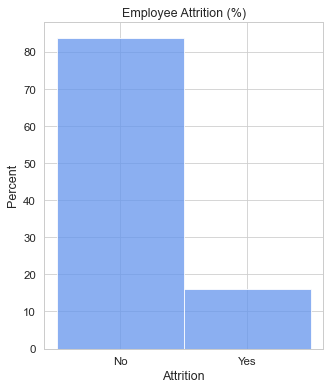

In [15]:
sns.set(context='paper', style='whitegrid', font_scale=1.3,
       rc={'figure.figsize':(5, 6)})
sns.histplot(data=df, x='Attrition', stat='percent', color = "cornflowerblue")
plt.title('Employee Attrition (%)');

We are obviously dealing with an imbalanced dataset. **84\%** of employees did not leave the company, while 'only' **16
\%** did. Not all models can deal with such data, so this info will help us later determine what will be the best approach to implement our predictive model.  

Let's have a quick look at the distribution of all the variables in our dataset.

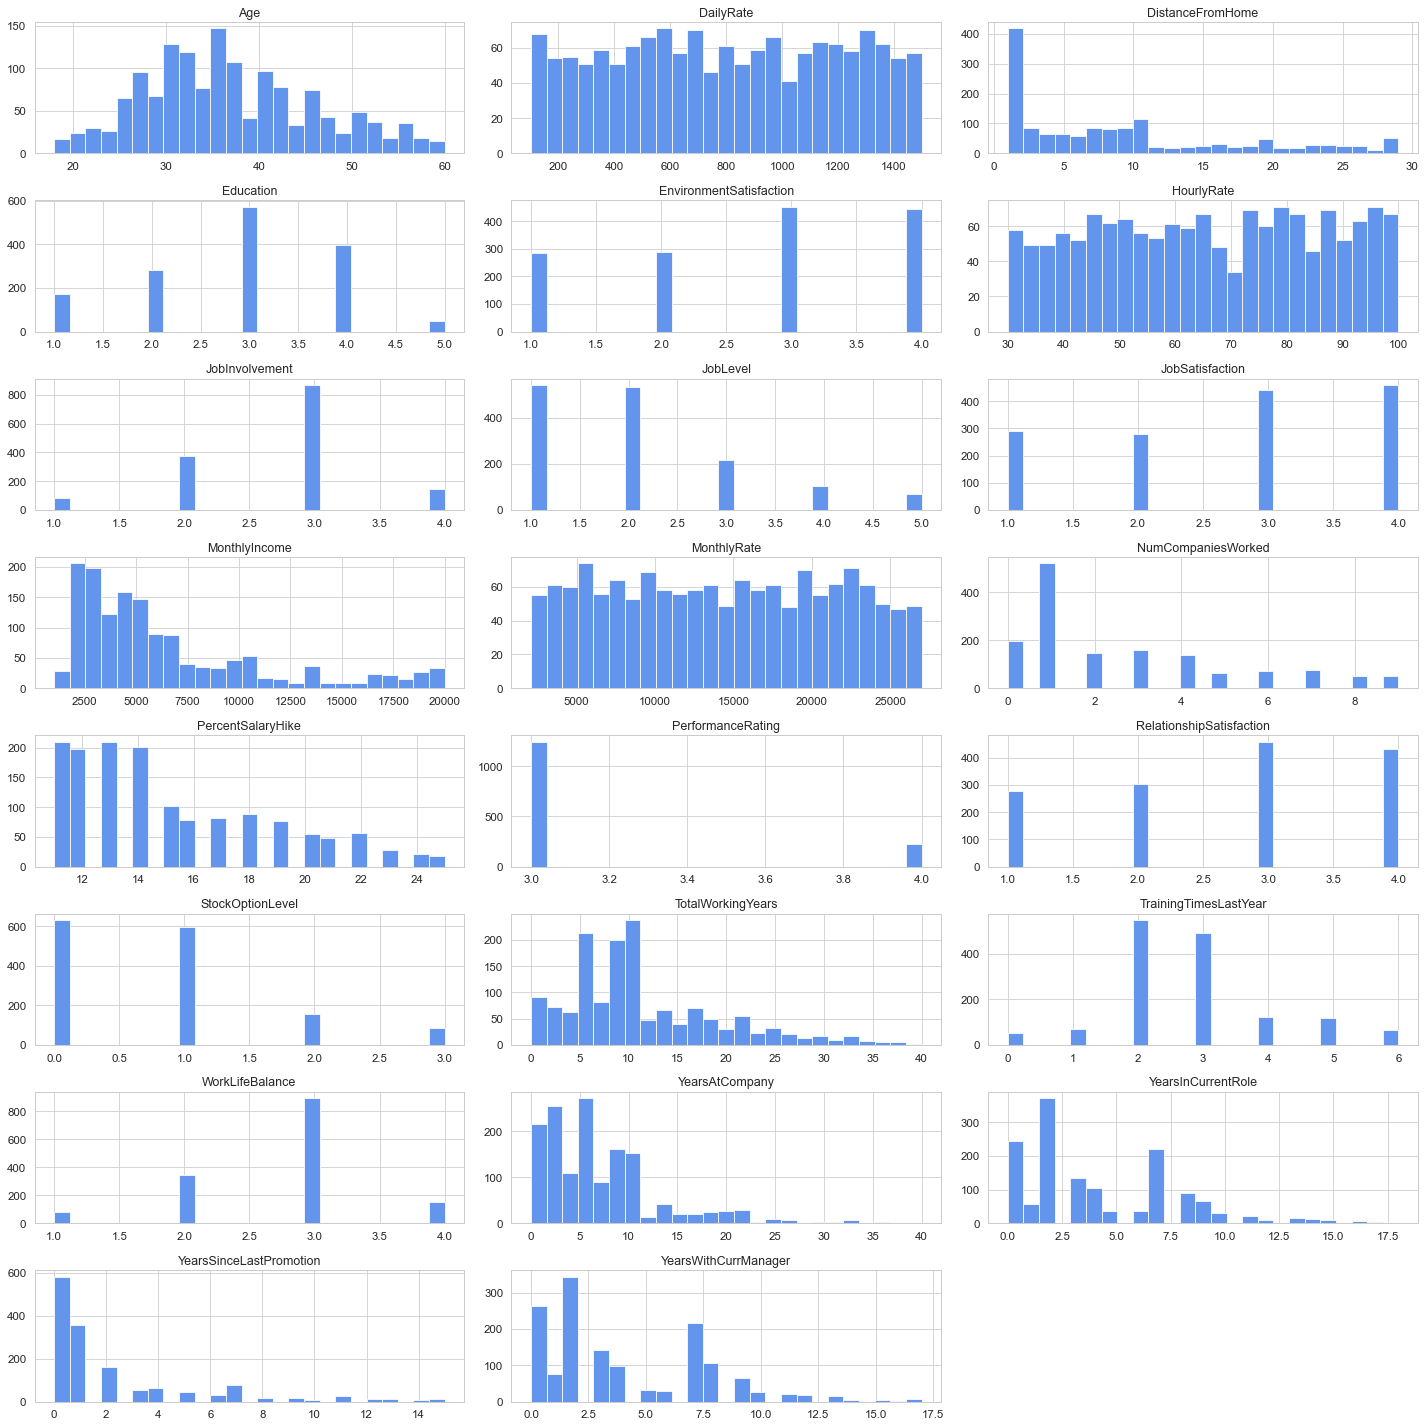

In [16]:
df.hist(bins=25, figsize=(20,20), color='cornflowerblue', layout=(8, 3))
plt.tight_layout();

### Looking for correlations

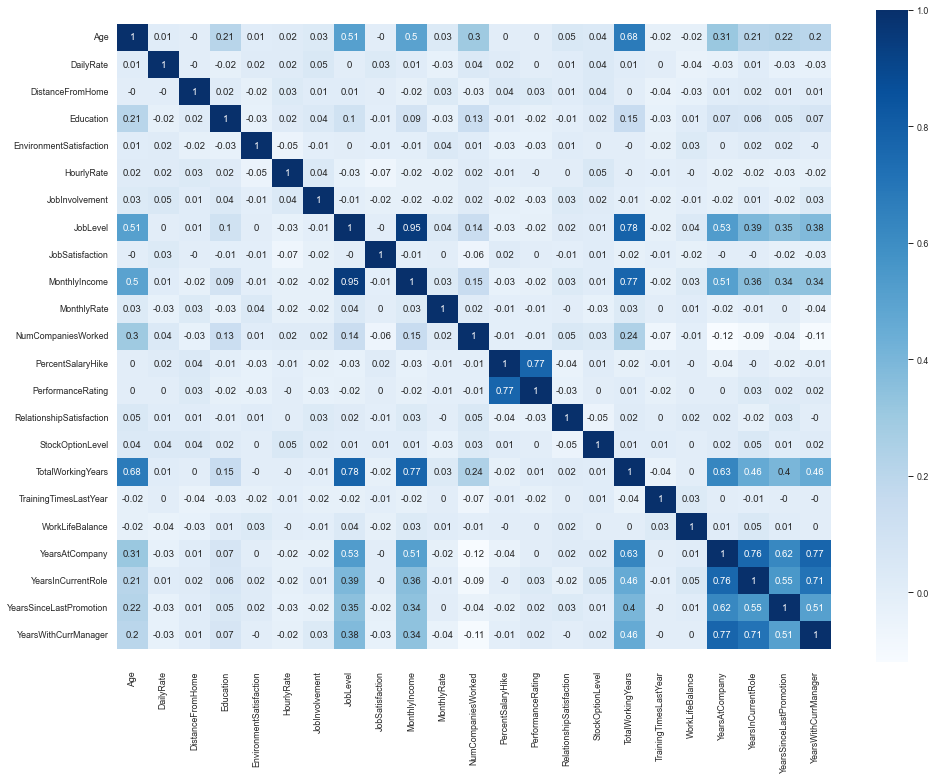

In [17]:
sns.set(context='paper', style='whitegrid')
correlation = df.corr().round(2)
f, ax = plt.subplots(figsize = (16,12))
a = sns.heatmap(correlation, annot = True, cmap='Blues')
bottom, top = a.get_ylim()
a.set_ylim(bottom + 0.5, top - 0.5);

## Analysis by employees

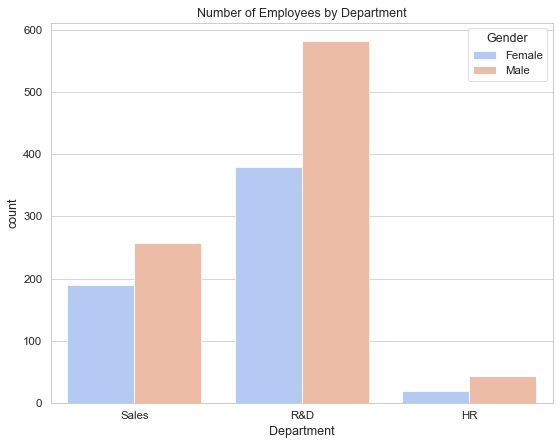

In [18]:
sns.set(context='paper', style='whitegrid', font_scale=1.3,
       rc={'figure.figsize':(9,7)})
sns.countplot(data=df, x='Department',
              hue='Gender', palette='coolwarm')
plt.title('Number of Employees by Department');

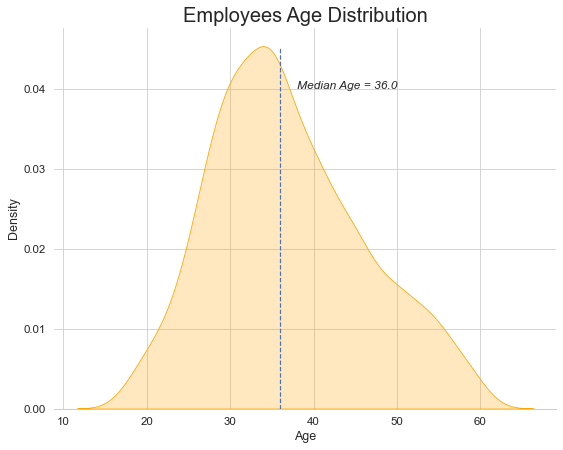

In [19]:
sns.kdeplot(data=df, x='Age',
             color = "orange", shade=True)

# Add vertical line
plt.axvline(df['Age'].median(),
            ymax = 0.95, linestyle = "--")

# Add median age of all employees
plt.text(df['Age'].median() + 2, 0.04,
         'Median Age = ' + str(df['Age'].median()), 
         fontsize = 12, style = "italic")
sns.despine(left=True)
plt.title('Employees Age Distribution', fontsize=20);

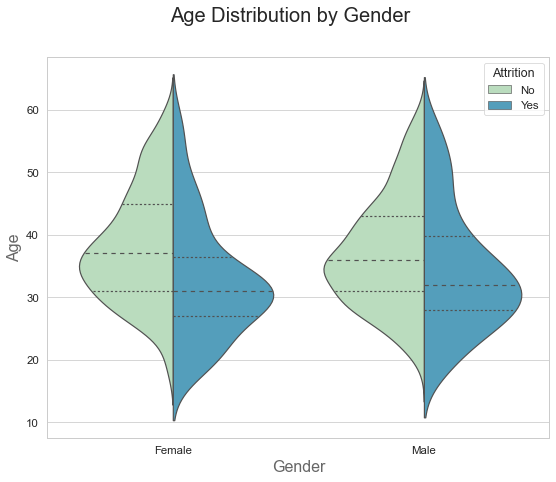

In [20]:
sns.violinplot(data=df, y='Age', x='Gender', 
               split=True, hue='Attrition', 
               inner='quartile', alpha=.6, palette='GnBu')

plt.xlabel('Gender', size=16, alpha=.7)
plt.ylabel('Age', size=16, alpha=.7)

plt.suptitle('Age Distribution by Gender', fontsize=20);

From the picture above we can see that the attrition rate keeps growing for employees between 18 and 30 to reach its maximum for the age group between 28 and 32 for males and females. Then, it keeps on failing with increasing age, as people look after stability in their jobs at these point of times.  
Both attrition curves are slightly positive skewed with a longer tail on the right side. Which means that the attrition grows faster than it falls.

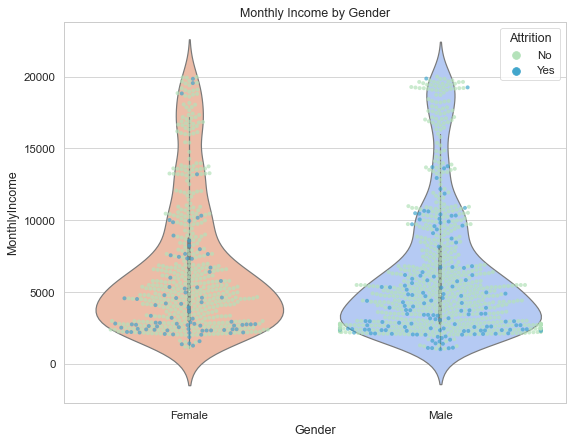

In [21]:
sns.violinplot(data=df, x='Gender', y='MonthlyIncome', palette='coolwarm_r')
sns.swarmplot(data=df, x='Gender', y='MonthlyIncome', 
             hue='Attrition', size=4, alpha=.7, palette='GnBu')
plt.title('Monthly Income by Gender');

#### Age vs Departments

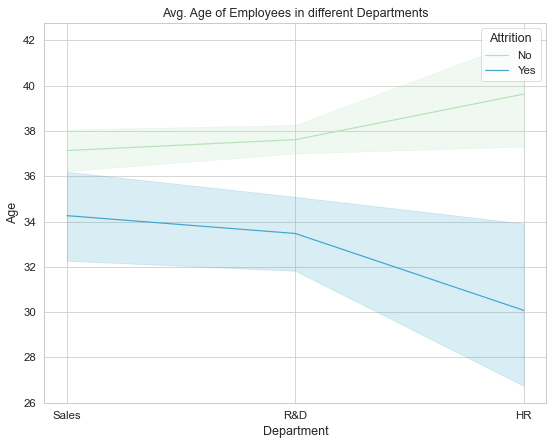

In [22]:
# lets plot a simple line plot
sns.lineplot(data= df, x='Department', y='Age', hue='Attrition', palette='GnBu');
plt.title('Avg. Age of Employees in different Departments');

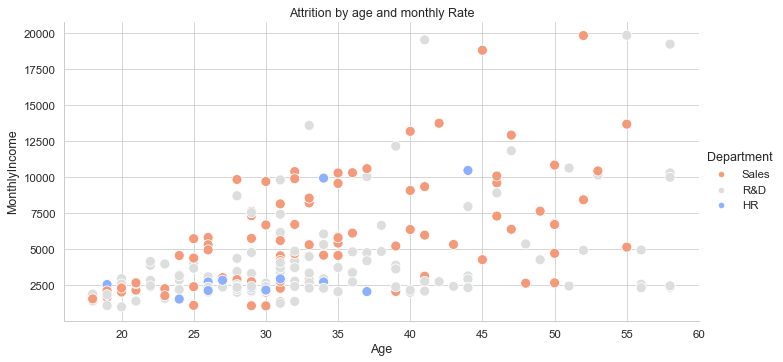

In [23]:
data = df[df['Attrition']=='Yes']
sns.relplot(data=data, x='Age',
            y='MonthlyIncome',
            hue='Department',
            palette='coolwarm_r',
            s=100, 
            kind="scatter",
            height=5, aspect=10/5
           )
plt.title('Attrition by age and monthly Rate');

### Analysis by jobs

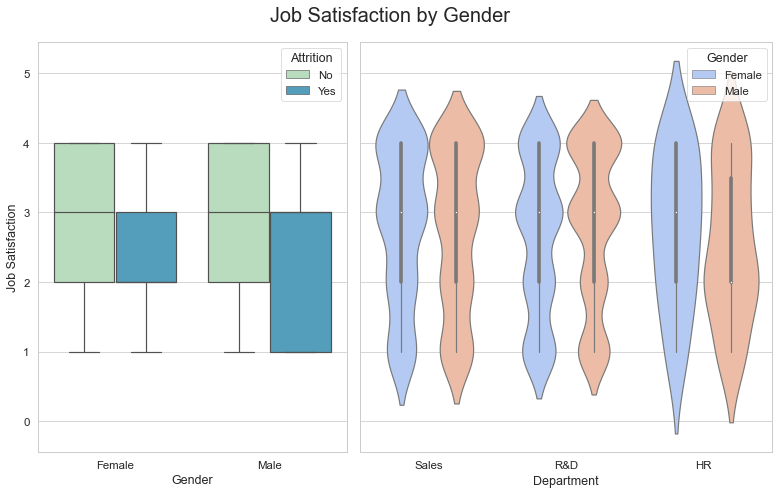

In [24]:
# use a matplotlib style
sns.set(context="paper", style='whitegrid', palette='spring_r', font_scale=1.3,
                rc={"figure.figsize": (11, 7)})
# Then we create a figure with two axes using matplotlib
fig, axs = plt.subplots(1, 2, gridspec_kw=dict(width_ratios=[3, 4]), sharey=True)

sns.boxplot(data=df, x='Gender', y='JobSatisfaction', 
             palette='GnBu', hue='Attrition', ax=axs[0])



sns.violinplot(data=df, x='Department', y='JobSatisfaction', 
               hue='Gender', palette='coolwarm', ax=axs[1]);
axs[1].set_ylabel('')
axs[0].set_ylabel('Job Satisfaction')
fig.suptitle('Job Satisfaction by Gender', fontsize=20)

plt.tight_layout()

I guess it was clear that people who tend to leave a company are the one, who are less satisfied. However, job satisfaction seems to be solely in HR gender related, where male tend to be less satisfied than women. Why that?

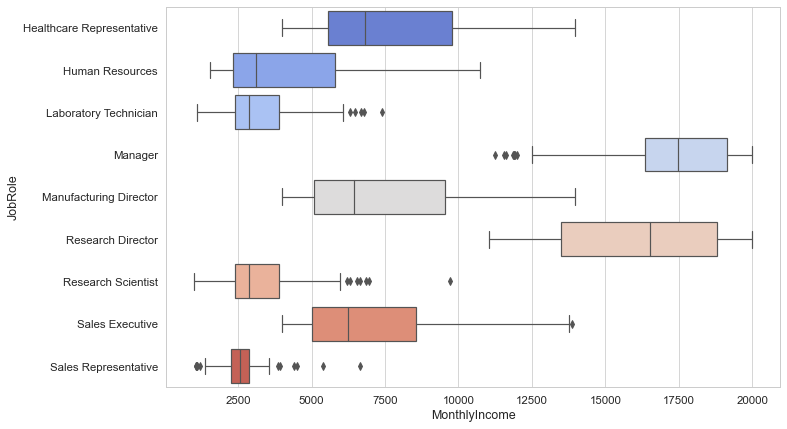

In [25]:
sns.boxplot(data=df, x='MonthlyIncome', y='JobRole', palette='coolwarm');

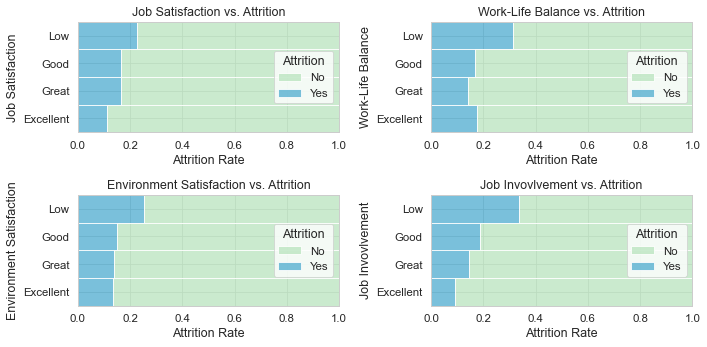

In [26]:
satisfactions = ['JobSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'JobInvolvement']
titles = [ "Job Satisfaction", "Work-Life Balance", "Environment Satisfaction", "Job Invovlvement"]
a = [(0, 0), (0, 1), (1, 0), (1, 1)]
# Create subplots - 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

for i, satisfaction in enumerate(satisfactions):
    df['Satisfac'] = df[satisfaction].replace(to_replace={
        1:'Low', 2:'Good', 3:'Great', 4:'Excellent'})
    df['Satisfac'] = pd.Categorical(df['Satisfac'], ['Low', 'Good', 'Great', 'Excellent'],)
    sns.histplot(data=df, y='Satisfac', hue='Attrition', palette='GnBu',
                 multiple='fill', alpha=.7, ax=axs[a[i]])
    axs[a[i]].set_xlabel("Attrition Rate")
    axs[a[i]].set_ylabel(titles[i])
    axs[a[i]].set_title(f"{titles[i]} vs. Attrition")
    plt.tight_layout();

Satisfaction, be it in job or environment as well as job involvement and work-life balance are negatively related to attrition. The less satisfied we are with any of these factors, the more likely we are to leave our job.

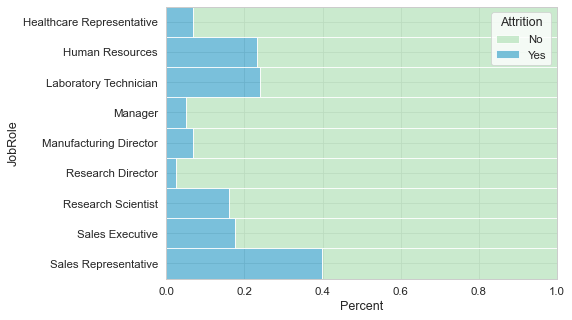

In [27]:
sns.set(context='paper', style='whitegrid', font_scale=1.3,
       rc={'figure.figsize':(7,5)})
sns.histplot(data=df, y='JobRole', hue='Attrition',
          stat='percent', multiple='fill', palette='GnBu', alpha=.7);

The attrition rate by sales representatives is much higher than any other. They tend to be also the youngest with almost all of them less than 38 years old. So it is possible that the job satisfactions by sales representatives are low. In second place come the laboratory technicians. So it would be interesting to investigate this further, such as:   
Their monthly rates, their job and other satisfactions.  

Another question comes in mind is: is the attrition rate related to age or to job role?

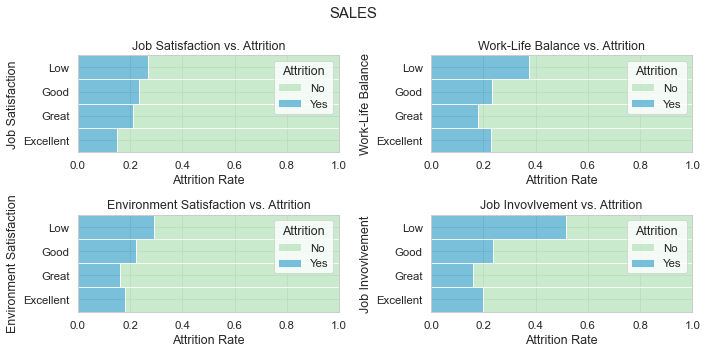

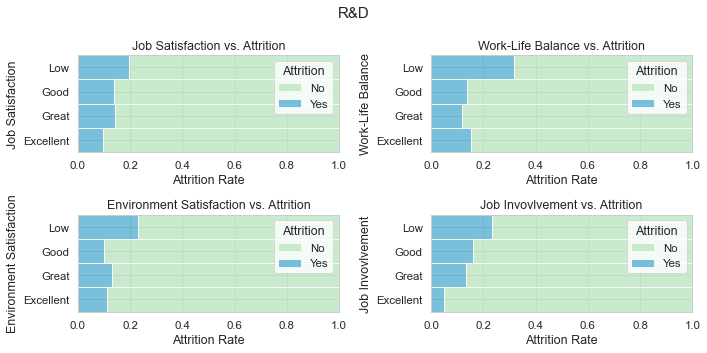

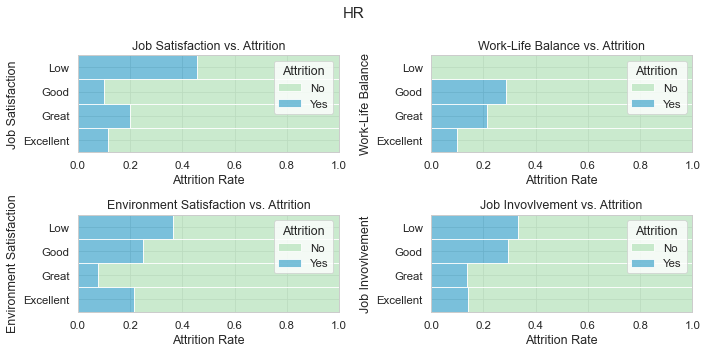

In [28]:
satisfactions = ['JobSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'JobInvolvement']
titles = [ "Job Satisfaction", "Work-Life Balance", "Environment Satisfaction", "Job Invovlvement"]
a = [(0, 0), (0, 1), (1, 0), (1, 1)]
# Create subplots - 2 rows, 2 columns

for dep in df['Department'].unique():
    fig, axs = plt.subplots(2, 2, figsize=(10, 5))
    plt.suptitle(dep.upper())
    for i, satisfaction in enumerate(satisfactions):
        df['Satisfac'] = df[satisfaction].replace(to_replace={
            1:'Low', 2:'Good', 3:'Great', 4:'Excellent'})
        df['Satisfac'] = pd.Categorical(df['Satisfac'], ['Low', 'Good', 'Great', 'Excellent'],)
        sns.histplot(data=df[df['Department']==dep], y='Satisfac', hue='Attrition', palette='GnBu',
                     multiple='fill', alpha=.7, ax=axs[a[i]])
        axs[a[i]].set_xlabel("Attrition Rate")
        axs[a[i]].set_ylabel(titles[i])
        axs[a[i]].set_title(f"{titles[i]} vs. Attrition")
        plt.tight_layout()
plt.tight_layout();

Job involvement in the **Sales department** seems to be a big problem. Over 50\% of the employees who left their sales jobs had a low job involvement level.  
Work-life balance and job satisfaction seem to be more of a problem in R&D and HR departments, respectively.  

We can go further and do some more fancy plots by using facet grids:

From the above plot we can derive some rules, to optimize our hiring strategy.

### Analysis by education

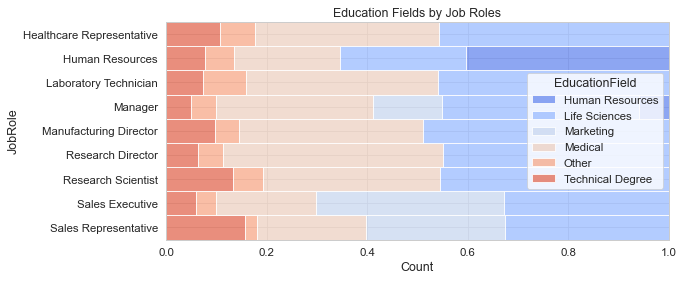

In [29]:
plt.rcParams['figure.figsize'] = 9, 4
sns.histplot(data=df, y='JobRole', multiple='fill',
             hue='EducationField', palette='coolwarm')
plt.title('Education Fields by Job Roles');

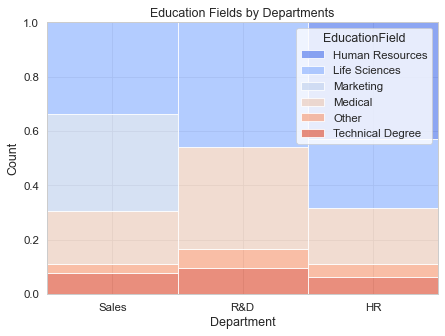

In [30]:
plt.rcParams['figure.figsize'] = 7, 5
sns.histplot(data=df, x='Department', multiple='fill',
             hue='EducationField', palette='coolwarm')
plt.title('Education Fields by Departments');

As we can see from the two above figures, there are a lot of doctors in the sample companies, also in the R&D department. So these could be companies from the pharma industry or other medical industries.

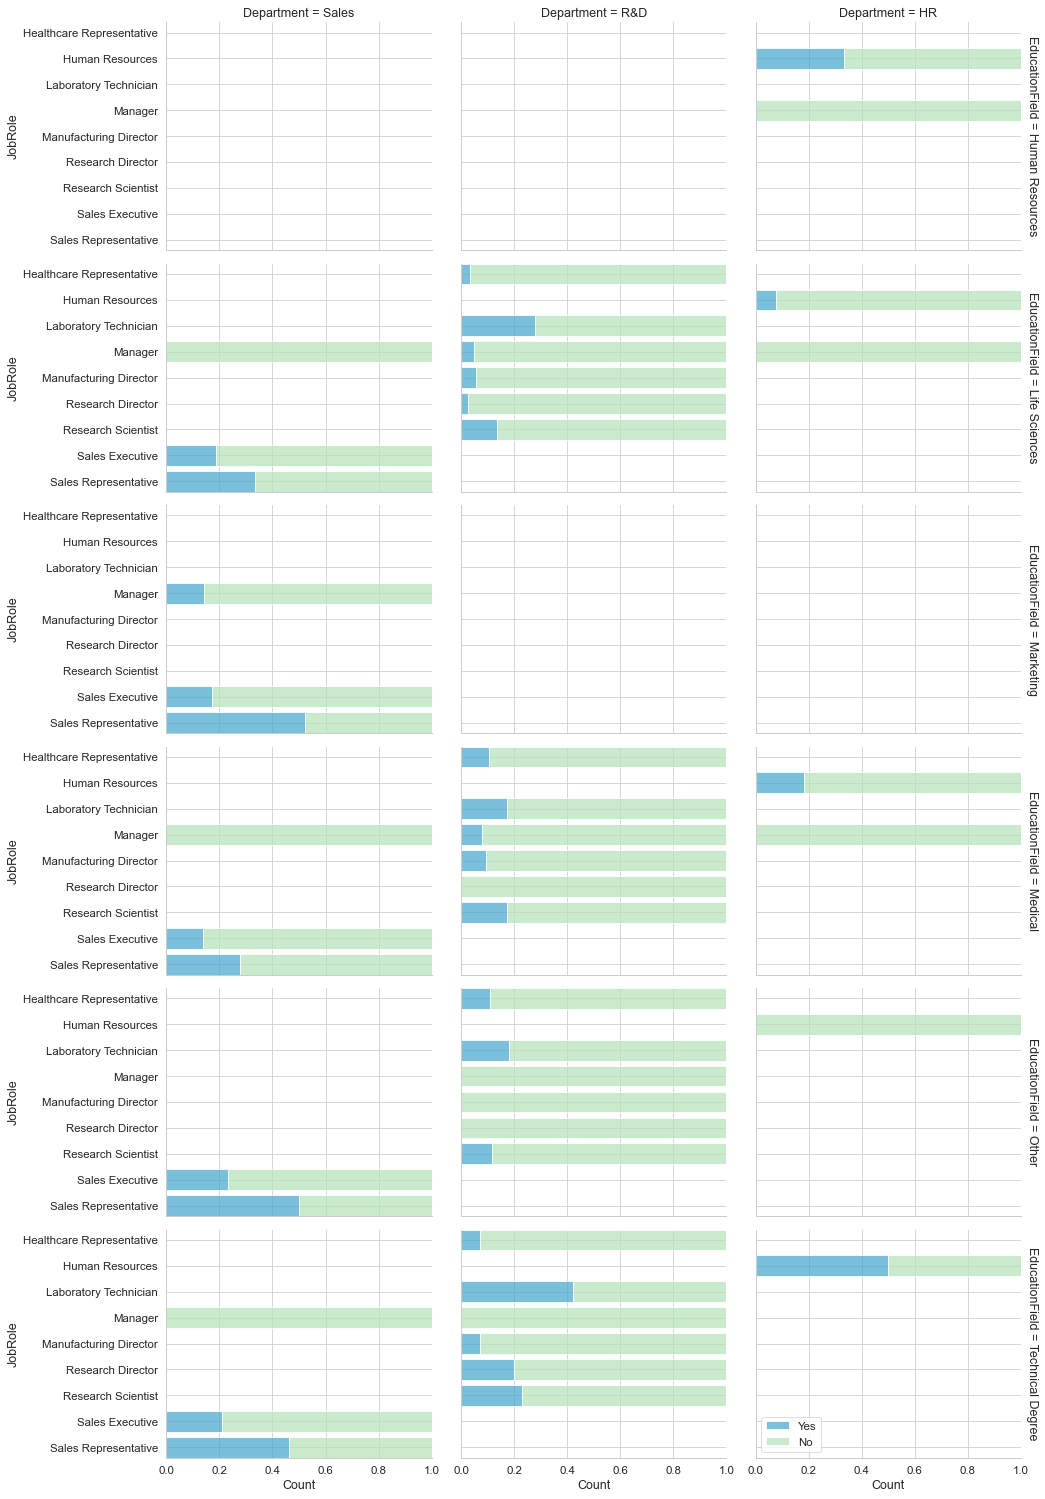

In [31]:
g = sns.FacetGrid(df, row='EducationField', col='Department', 
                  legend_out=True, 
                  height=3.5,  aspect=1.4, margin_titles=True)


g.map_dataframe(sns.histplot, y='JobRole',  hue='Attrition', 
                 palette='GnBu', alpha=.7, multiple='fill', shrink=.8)

plt.legend(['Yes', 'No'])
g.tight_layout()

## Model Building

We want to predict the probability that an employee is going to leave the company or not. Thus, we are dealing with a logistic regression problem.

### Data Preprocessing

In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfac
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,Great
1,49,No,Travel_Frequently,279,R&D,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,Good
2,37,Yes,Travel_Rarely,1373,R&D,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,Good
3,33,No,Travel_Frequently,1392,R&D,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,Great
4,27,No,Travel_Rarely,591,R&D,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,Great


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

We need first to separate categorical and numerical variables using their data types to identify them. We make use of `select_dtypes` helper to select the corresponding columns.

In [34]:
data = df.drop(columns='Attrition')
target = df['Attrition']
numerical_columns = data.select_dtypes(include='number').columns
categorical_columns = data.select_dtypes(include='category').columns

We first define the columns preprocessing activities depending on their data type:
* `OrdinalEncoder` for categorical data 
* `StandardScaler` for numerical data

In [35]:
categorical_prep = OrdinalEncoder(handle_unknown="use_encoded_value",
                                 unknown_value=-1)
numerical_prep = StandardScaler()

Scikit-learn provides a `ColumnTransform` class which will send specific columns to a specific transformer, making it easy to fit a single predictive model on a dataset that combines both kind of variables together (heterogeneously typed tabular data).

In [36]:
preprocessor = ColumnTransformer([
    ('ordinal-enc', categorical_prep, categorical_columns),
    ('standard-scaler', numerical_prep, numerical_columns)
])

In [37]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [38]:
data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    test_size=.25, 
                                                                    random_state=23)

In [39]:
model.fit(data_train, target_train);

To get directly the accuracy score, we need to call the `score` method. Let's compute the accuracy on the entire test set.

In [40]:
model.score(data_test, target_test)

0.8532608695652174

### Evaluation of the model with cross-validation

The accuracy score from above is highly dependent on the random_state. So we don't really know how robust is our model, or we could change the random state until we get a better result. To avoid this we evaluate the model using cross-validation

In [41]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([0.07691503, 0.08533502, 0.106143  , 0.04792595, 0.0677309 ]),
 'score_time': array([0.01899695, 0.02139497, 0.01048398, 0.00830483, 0.01165724]),
 'test_score': array([0.8707483 , 0.86734694, 0.86054422, 0.85714286, 0.88095238])}

In [42]:
scores = cv_results['test_score']
print("The average accuracy score is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The average accuracy score is: 0.867 +/- 0.008
